## Name: Preetham L
## USN: 21BTRCL079

# Covid-19 Data Analysis, Part-1

## Task 1: Load and Pre-process the Dataset


In [13]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasets/covid-19/main/data/countries-aggregated.csv"
df = pd.read_csv(url)


In [11]:
missing_values = df.isnull().sum()
print(missing_values)
# Handle missing values if any


Date         0
Country      0
Confirmed    0
Recovered    0
Deaths       0
dtype: int64


In [12]:
df['Date'] = pd.to_datetime(df['Date'])


## Task 2: Data Exploration and Cleaning


In [6]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 161568 entries, 0 to 161567
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       161568 non-null  datetime64[ns]
 1   Country    161568 non-null  object        
 2   Confirmed  161568 non-null  int64         
 3   Recovered  161568 non-null  int64         
 4   Deaths     161568 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 6.2+ MB
None


In [7]:
print(df.head())


        Date      Country  Confirmed  Recovered  Deaths
0 2020-01-22  Afghanistan          0          0       0
1 2020-01-23  Afghanistan          0          0       0
2 2020-01-24  Afghanistan          0          0       0
3 2020-01-25  Afghanistan          0          0       0
4 2020-01-26  Afghanistan          0          0       0


In [9]:
df.describe()
# Handle any identified outliers


,Date,Confirmed,Recovered,Deaths
count,161568,1.615680e+05,1.615680e+05,161568.000000
mean,2021-03-04 11:59:59.999999232,7.361569e+05,1.453967e+05,13999.436089
min,2020-01-22 00:00:00,0.000000e+00,0.000000e+00,0.000000
25%,2020-08-12 18:00:00,1.220000e+03,0.000000e+00,17.000000
50%,2021-03-04 12:00:00,2.369200e+04,1.260000e+02,365.000000
75%,2021-09-24 06:00:00,2.558420e+05,1.797225e+04,4509.000000
max,2022-04-16 00:00:00,8.062512e+07,3.097475e+07,988609.000000
std,NaN,3.578884e+06,9.748275e+05,59113.581271


## Task 3: Visualize Global Trends


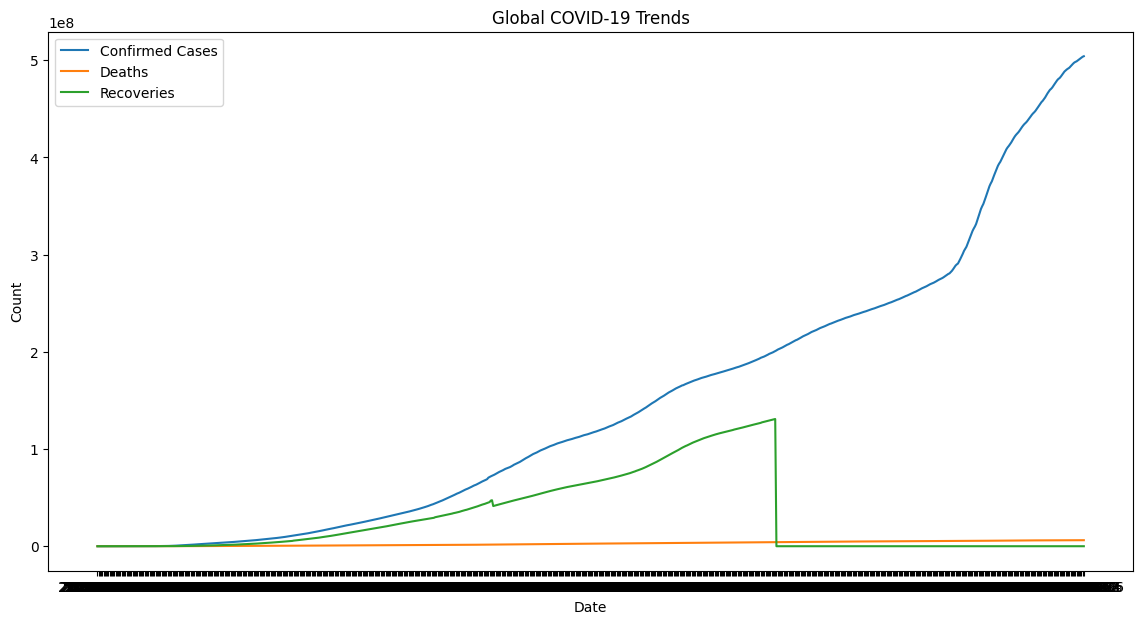

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

global_trends = df.groupby('Date').sum().reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=global_trends, x='Date', y='Confirmed', label='Confirmed Cases')
sns.lineplot(data=global_trends, x='Date', y='Deaths', label='Deaths')
sns.lineplot(data=global_trends, x='Date', y='Recovered', label='Recoveries')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global COVID-19 Trends')
plt.legend()
plt.show()


## Task 4: Country-Specific Analysis


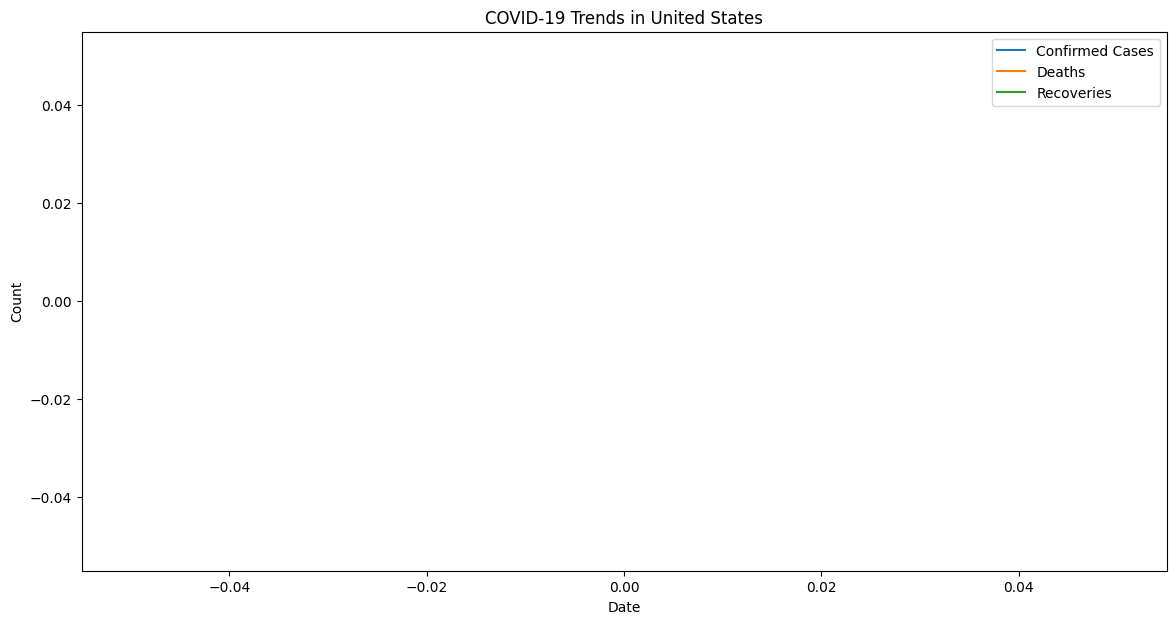

In [15]:
country = 'United States'  # Example country
country_data = df[df['Country'] == country]

plt.figure(figsize=(14, 7))
sns.lineplot(data=country_data, x='Date', y='Confirmed', label='Confirmed Cases')
sns.lineplot(data=country_data, x='Date', y='Deaths', label='Deaths')
sns.lineplot(data=country_data, x='Date', y='Recovered', label='Recoveries')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title(f'COVID-19 Trends in {country}')
plt.legend()
plt.show()


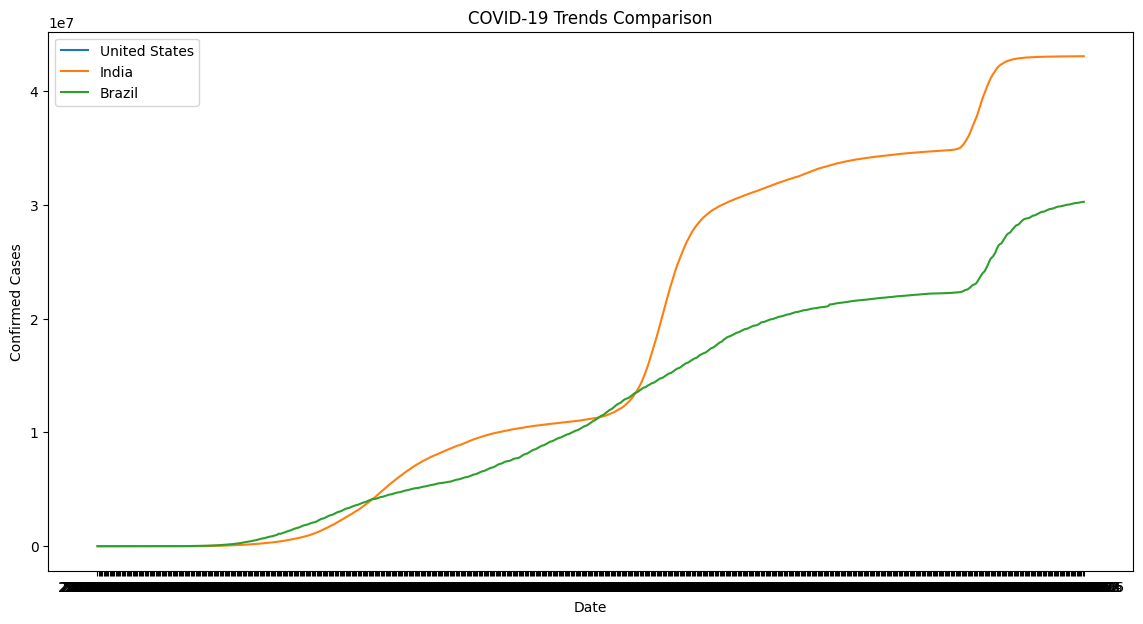

In [16]:
countries = ['United States', 'India', 'Brazil']  # Example countries
plt.figure(figsize=(14, 7))

for country in countries:
    country_data = df[df['Country'] == country]
    sns.lineplot(data=country_data, x='Date', y='Confirmed', label=country)

plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('COVID-19 Trends Comparison')
plt.legend()
plt.show()


## Task 5: Comparative Analysis


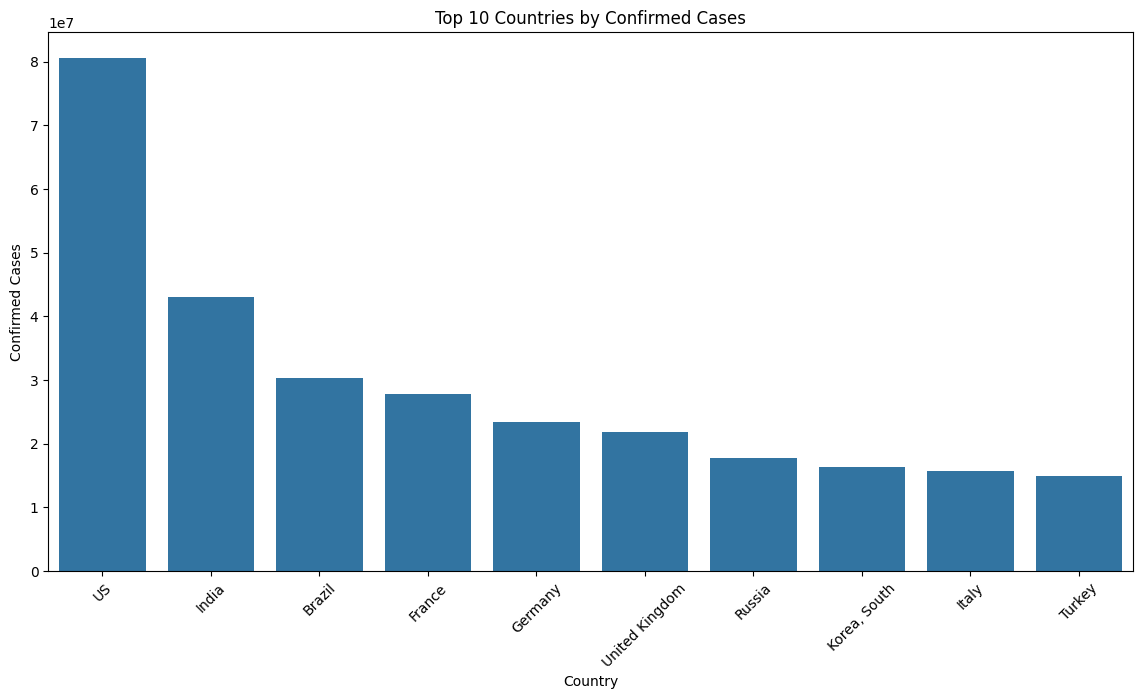

In [17]:
latest_data = df[df['Date'] == df['Date'].max()]
top_10_countries = latest_data.nlargest(10, 'Confirmed')

plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_countries, x='Country', y='Confirmed')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.title('Top 10 Countries by Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


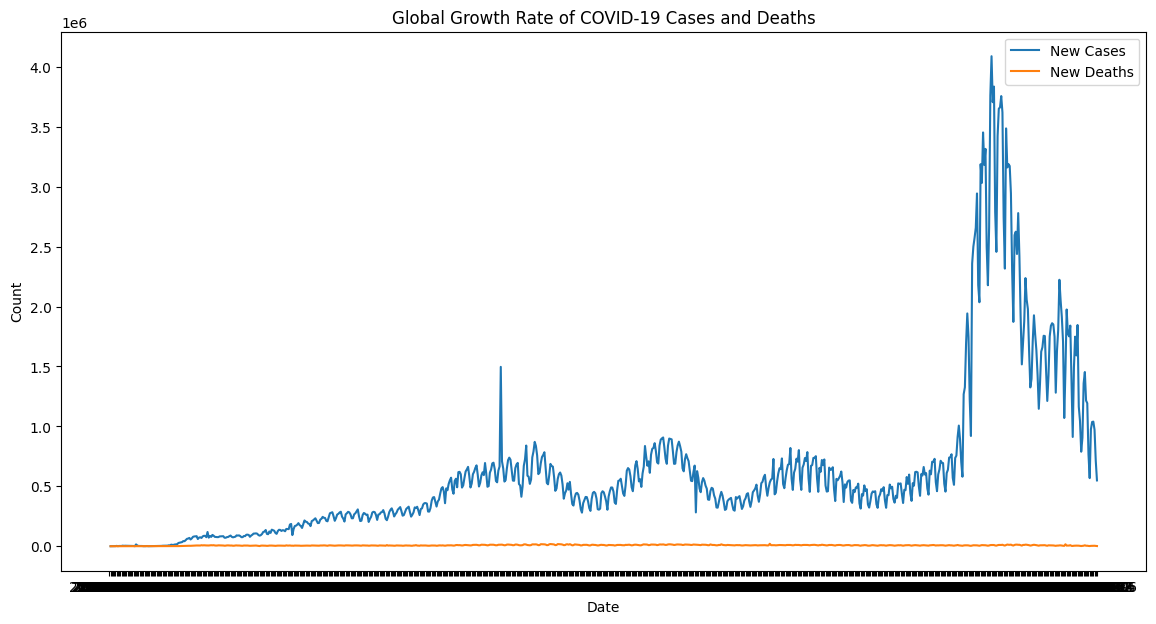

In [18]:
global_trends['New_Cases'] = global_trends['Confirmed'].diff()
global_trends['New_Deaths'] = global_trends['Deaths'].diff()

plt.figure(figsize=(14, 7))
sns.lineplot(data=global_trends, x='Date', y='New_Cases', label='New Cases')
sns.lineplot(data=global_trends, x='Date', y='New_Deaths', label='New Deaths')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global Growth Rate of COVID-19 Cases and Deaths')
plt.legend()
plt.show()


## Task 6: Correlation Analysis


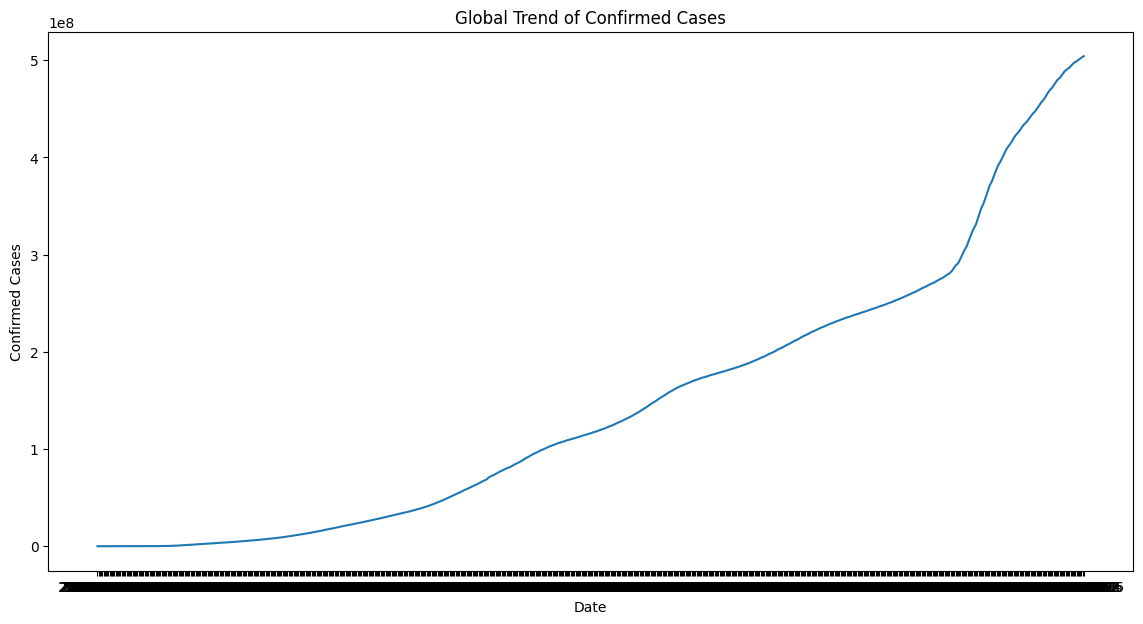

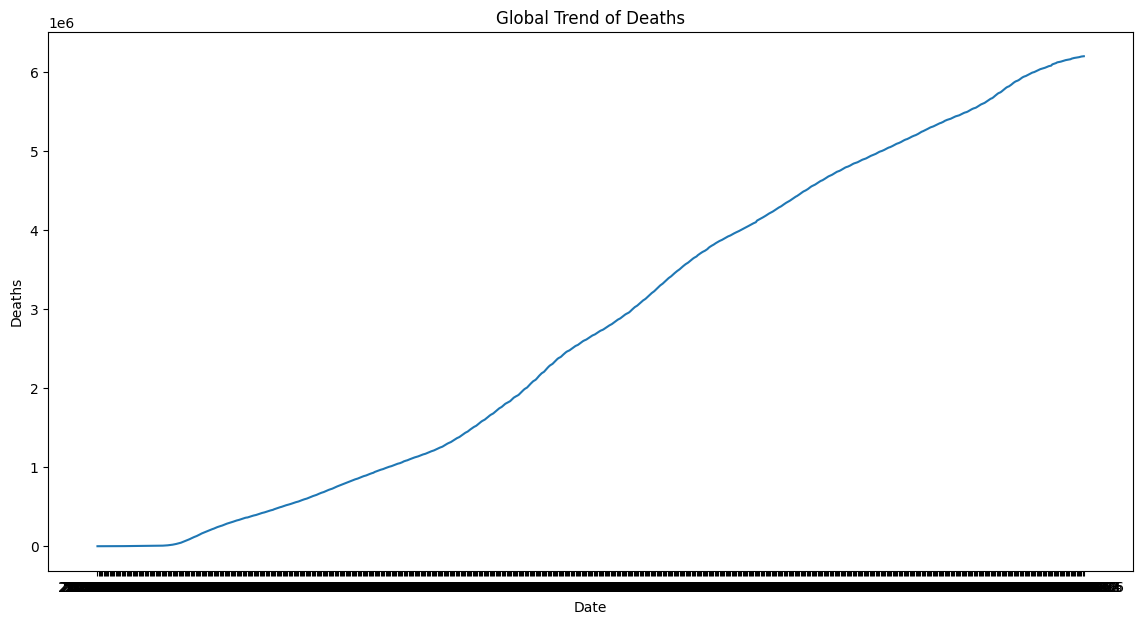

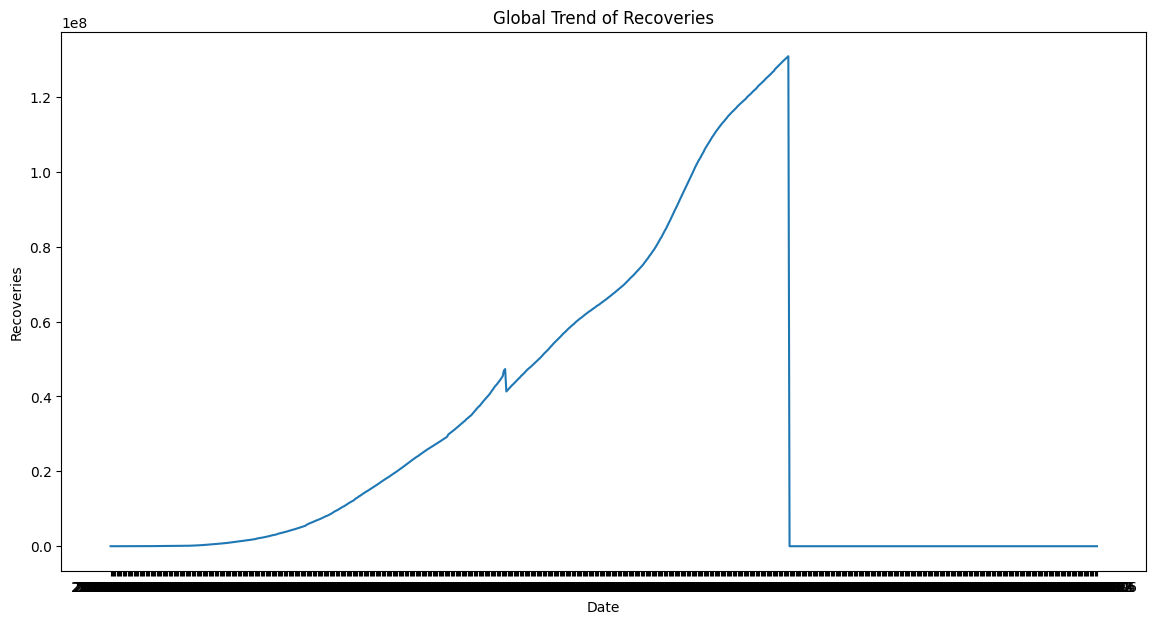

In [19]:
corr_matrix = global_trends[['Confirmed', 'Deaths', 'Recovered']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of COVID-19 Data')
plt.show()


# Covid-19 Data Analysis, Part-2


## Global Trends Over Time:

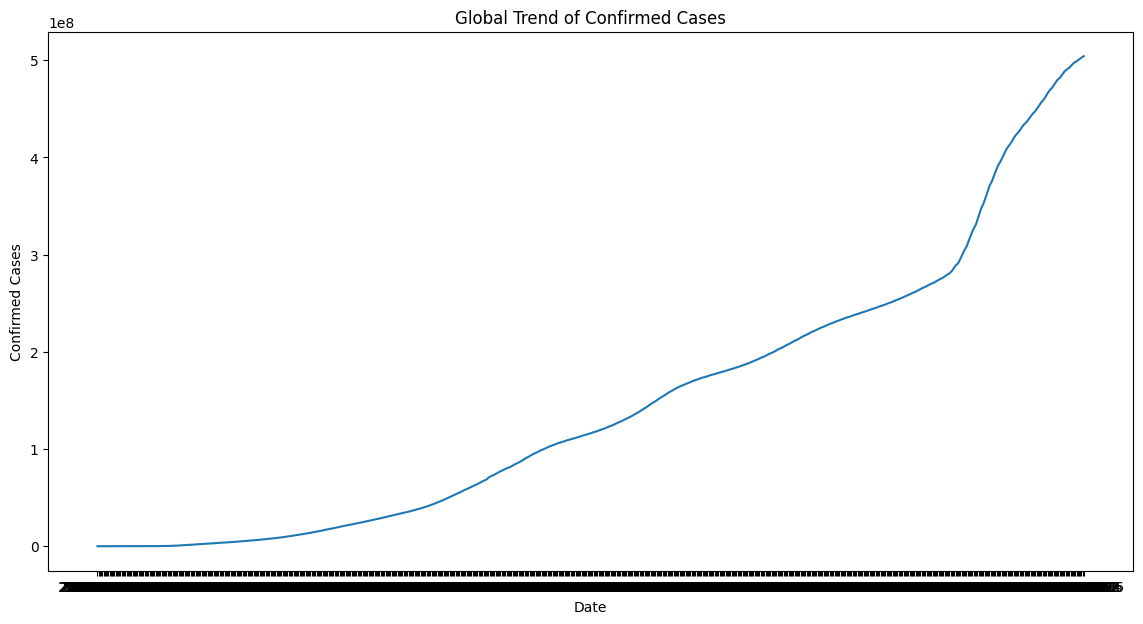

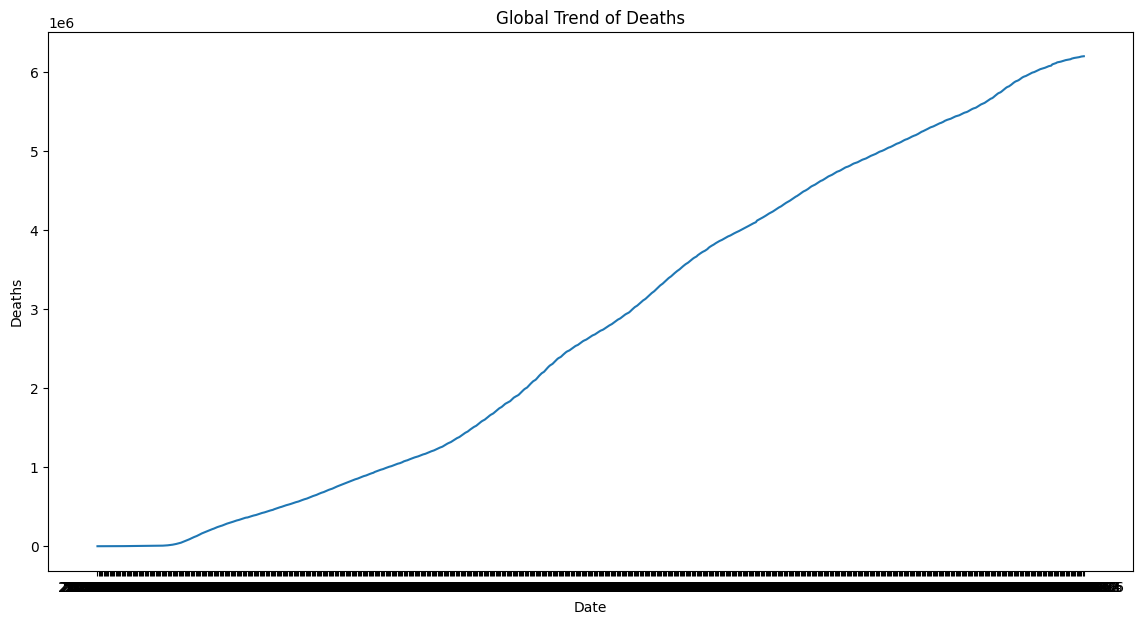

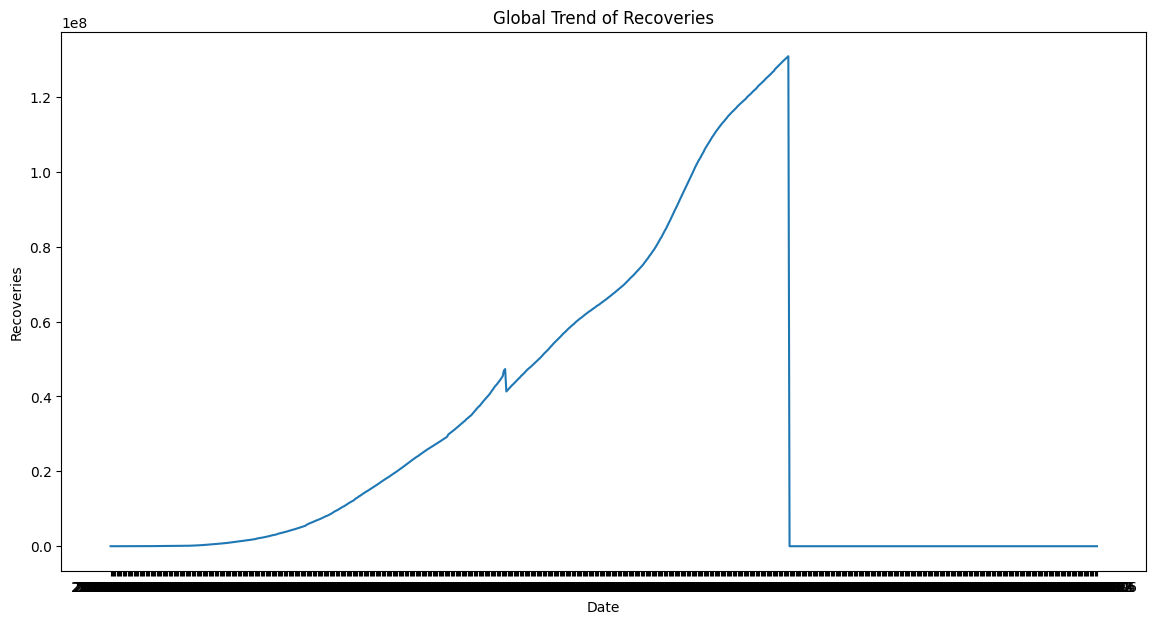

In [20]:
plt.figure(figsize=(14, 7))
sns.lineplot(data=global_trends, x='Date', y='Confirmed')
plt.xlabel('Date')
plt.ylabel('Confirmed Cases')
plt.title('Global Trend of Confirmed Cases')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=global_trends, x='Date', y='Deaths')
plt.xlabel('Date')
plt.ylabel('Deaths')
plt.title('Global Trend of Deaths')
plt.show()

plt.figure(figsize=(14, 7))
sns.lineplot(data=global_trends, x='Date', y='Recovered')
plt.xlabel('Date')
plt.ylabel('Recoveries')
plt.title('Global Trend of Recoveries')
plt.show()


## Trends of Top 5 Most Affected Countries:

In [21]:
highest_cases = latest_data.loc[latest_data['Confirmed'].idxmax()]
highest_deaths = latest_data.loc[latest_data['Deaths'].idxmax()]
highest_recoveries = latest_data.loc[latest_data['Recovered'].idxmax()]
print(highest_cases['Country'], highest_cases['Confirmed'])
print(highest_deaths['Country'], highest_deaths['Deaths'])
print(highest_recoveries['Country'], highest_recoveries['Recovered'])


US 80625120
US 988609
Afghanistan 0


## Growth Rate of Cases, Deaths, and Recoveries Globally:



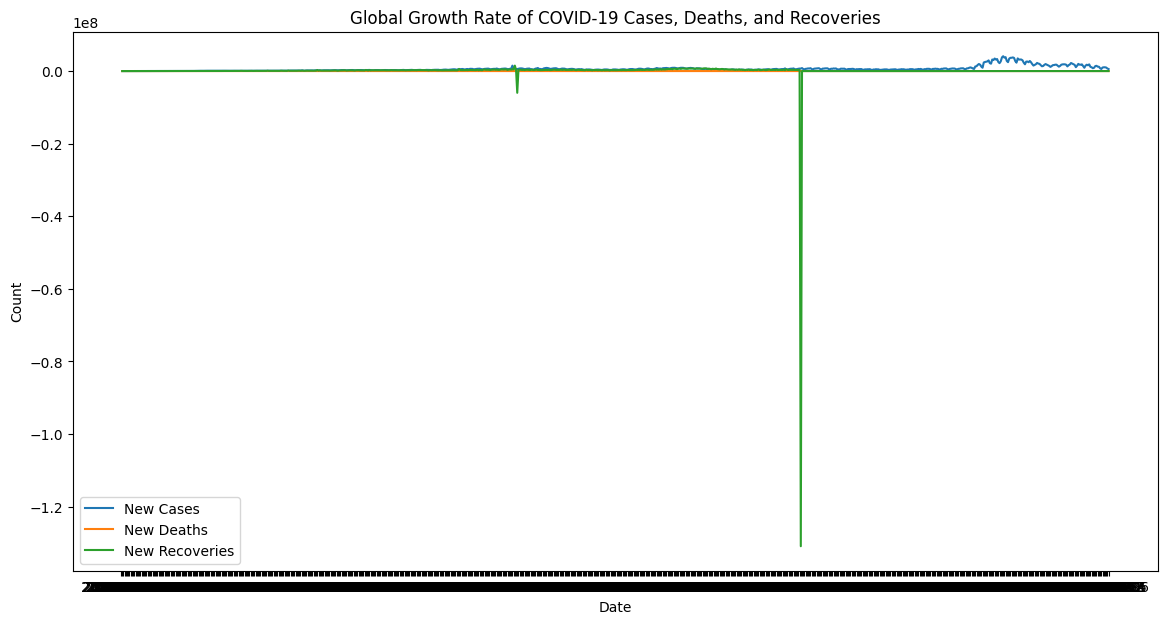

In [22]:
global_trends['New_Recoveries'] = global_trends['Recovered'].diff()

plt.figure(figsize=(14, 7))
sns.lineplot(data=global_trends, x='Date', y='New_Cases', label='New Cases')
sns.lineplot(data=global_trends, x='Date', y='New_Deaths', label='New Deaths')
sns.lineplot(data=global_trends, x='Date', y='New_Recoveries', label='New Recoveries')
plt.xlabel('Date')
plt.ylabel('Count')
plt.title('Global Growth Rate of COVID-19 Cases, Deaths, and Recoveries')
plt.legend()
plt.show()


## Cumulative Cases for Top 10 Most Affected Countries:



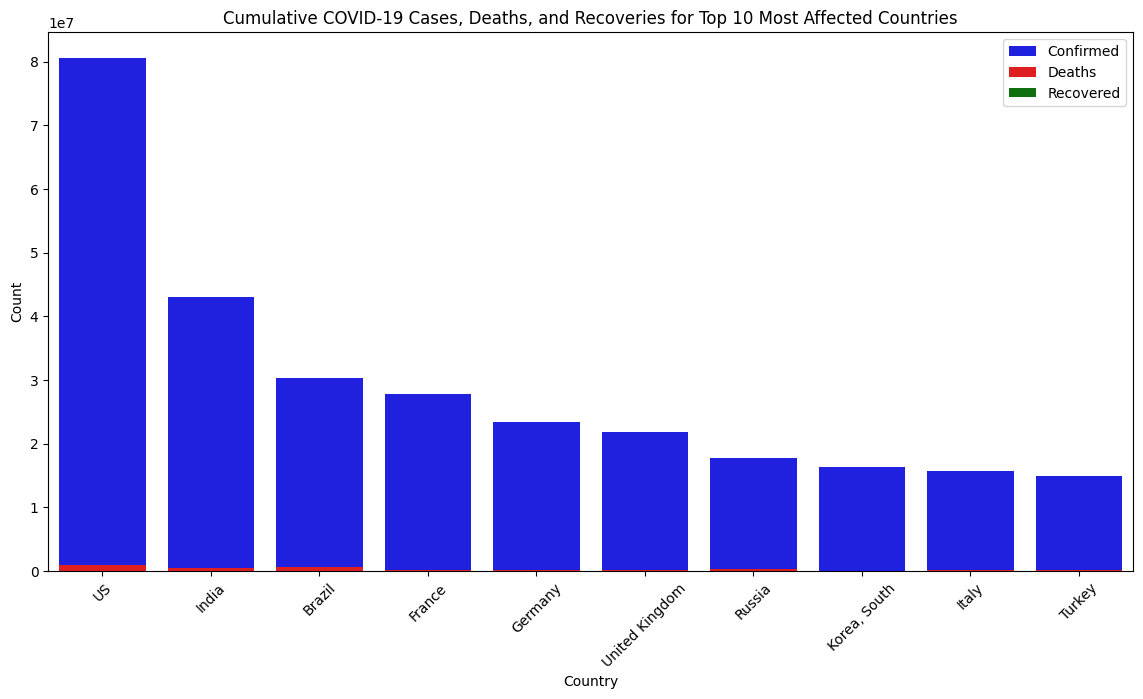

In [23]:
plt.figure(figsize=(14, 7))
sns.barplot(data=top_10_countries, x='Country', y='Confirmed', color='blue', label='Confirmed')
sns.barplot(data=top_10_countries, x='Country', y='Deaths', color='red', label='Deaths')
sns.barplot(data=top_10_countries, x='Country', y='Recovered', color='green', label='Recovered')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Cumulative COVID-19 Cases, Deaths, and Recoveries for Top 10 Most Affected Countries')
plt.legend()
plt.xticks(rotation=45)
plt.show()


## Recovery Rate Comparison:




<ipython-input-24-3865a8a8c3a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  latest_data['Recovery_Rate'] = latest_data['Recovered'] / latest_data['Confirmed']


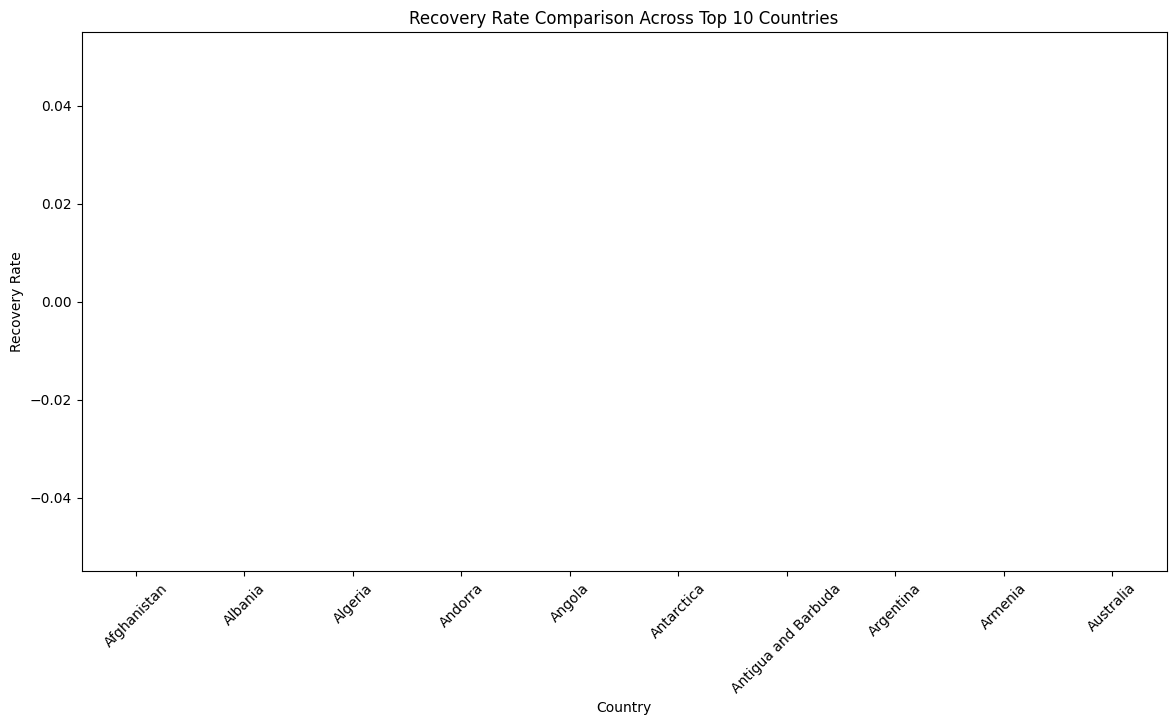

In [24]:
latest_data['Recovery_Rate'] = latest_data['Recovered'] / latest_data['Confirmed']
plt.figure(figsize=(14, 7))
sns.barplot(data=latest_data.nlargest(10, 'Recovery_Rate'), x='Country', y='Recovery_Rate')
plt.xlabel('Country')
plt.ylabel('Recovery Rate')
plt.title('Recovery Rate Comparison Across Top 10 Countries')
plt.xticks(rotation=45)
plt.show()


## Correlation Between Variables:


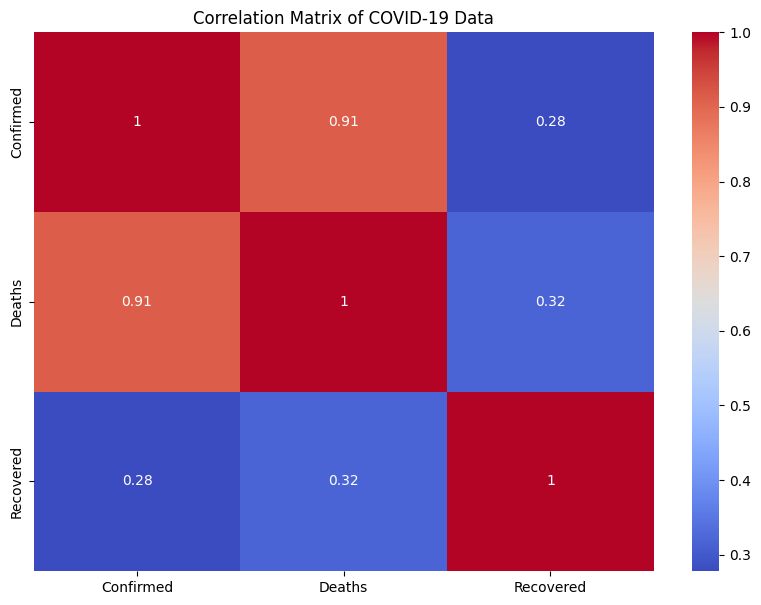

In [25]:
corr_matrix = df[['Confirmed', 'Deaths', 'Recovered']].corr()
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of COVID-19 Data')
plt.show()


## Impact of Lockdown Measures:

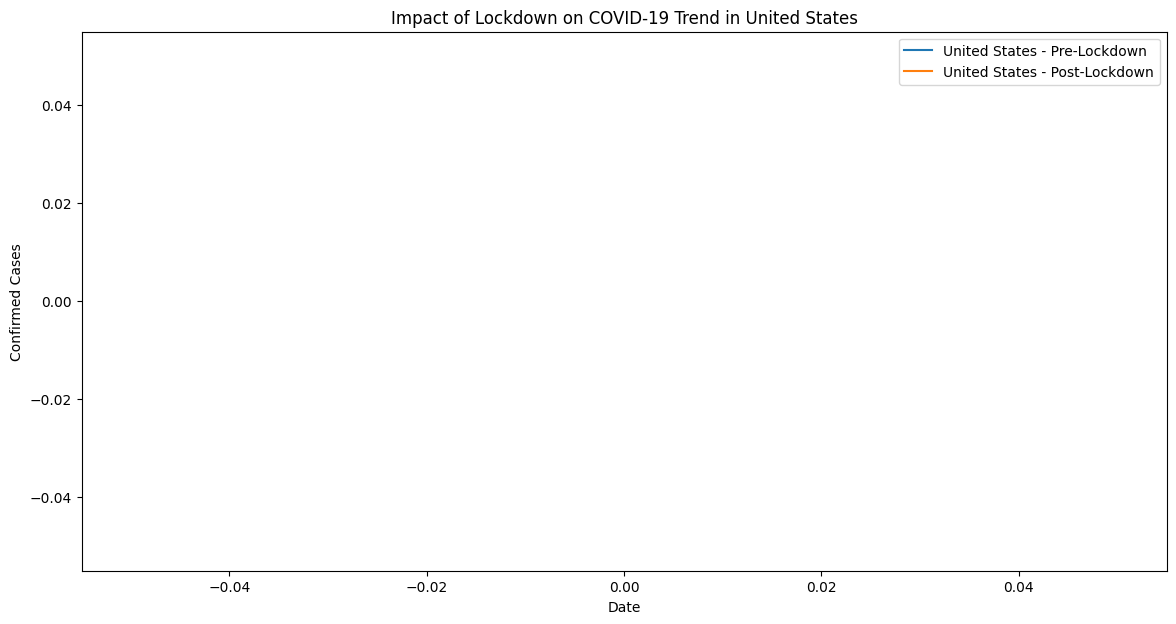

In [26]:
# Assuming 'lockdown_dates' is a dictionary with countries as keys and lockdown start dates as values
lockdown_dates = {
    'United States': '2020-03-20',
    # Add more countries
}

for country, lockdown_date in lockdown_dates.items():
    country_data = df[df['Country'] == country]
    lockdown_date = pd.to_datetime(lockdown_date)
    pre_lockdown = country_data[country_data['Date'] < lockdown_date]
    post_lockdown = country_data[country_data['Date'] >= lockdown_date]

    plt.figure(figsize=(14, 7))
    sns.lineplot(data=pre_lockdown, x='Date', y='Confirmed', label=f'{country} - Pre-Lockdown')
    sns.lineplot(data=post_lockdown, x='Date', y='Confirmed', label=f'{country} - Post-Lockdown')
    plt.xlabel('Date')
    plt.ylabel('Confirmed Cases')
    plt.title(f'Impact of Lockdown on COVID-19 Trend in {country}')
    plt.legend()
    plt.show()


## Confirmed Cases vs Recovered



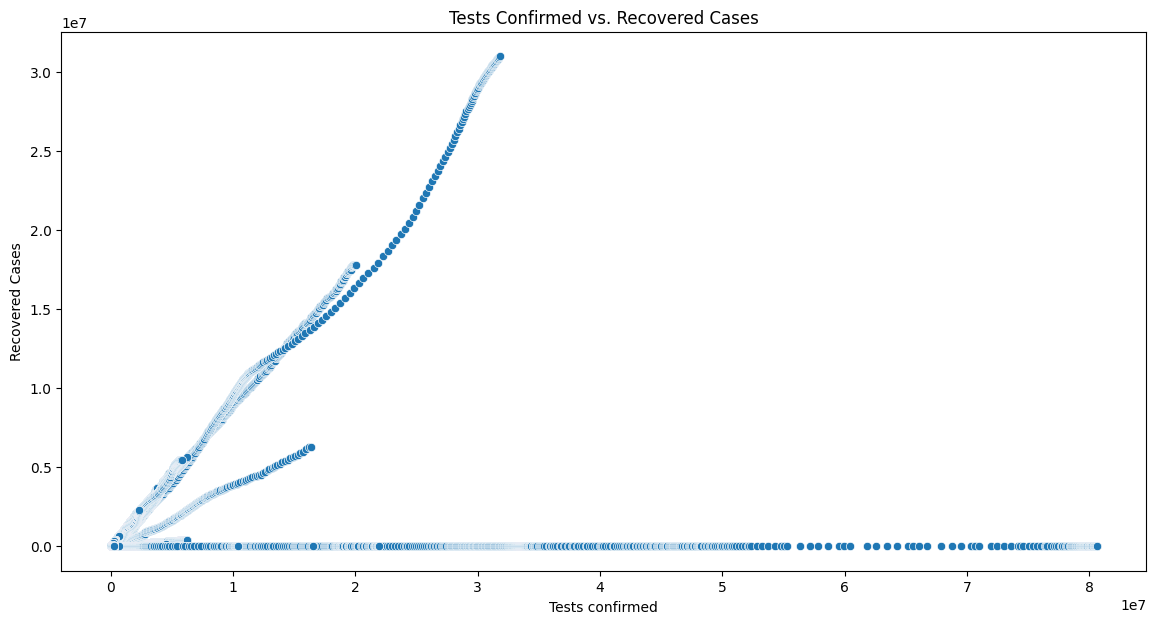

In [44]:


plt.figure(figsize=(14, 7))
sns.scatterplot(data=merged_data, x='Confirmed_x', y='Recovered_x')
plt.xlabel('Tests confirmed')
plt.ylabel('Recovered Cases')
plt.title('Tests Confirmed vs. Recovered Cases')
plt.show()

